In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
data = pd.read_csv('german_credit.csv')
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
data.shape

(1000, 21)

In [4]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [5]:
# Print Shape of model data
df1 = data.select_dtypes(include = np.number)#Only Numeric columns
df2 = data.select_dtypes(include= object)# Only categorical columns used for get_dummies
df3 = pd.get_dummies(df2)
df = pd.concat([df1, df3], axis=1) #concatinated the original df numeric columns with dummies
df.head(5)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [6]:
df.isna().sum()

default                                                                       0
duration_in_month                                                             0
credit_amount                                                                 0
installment_as_income_perc                                                    0
present_res_since                                                             0
age                                                                           0
credits_this_bank                                                             0
people_under_maintenance                                                      0
account_check_status_0 <= ... < 200 DM                                        0
account_check_status_< 0 DM                                                   0
account_check_status_>= 200 DM / salary assignments for at least 1 year       0
account_check_status_no checking account                                      0
credit_history_all credits at this bank 

In [7]:
### Check for highly correlated variables but don't required any treatment for this use case

In [8]:
df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


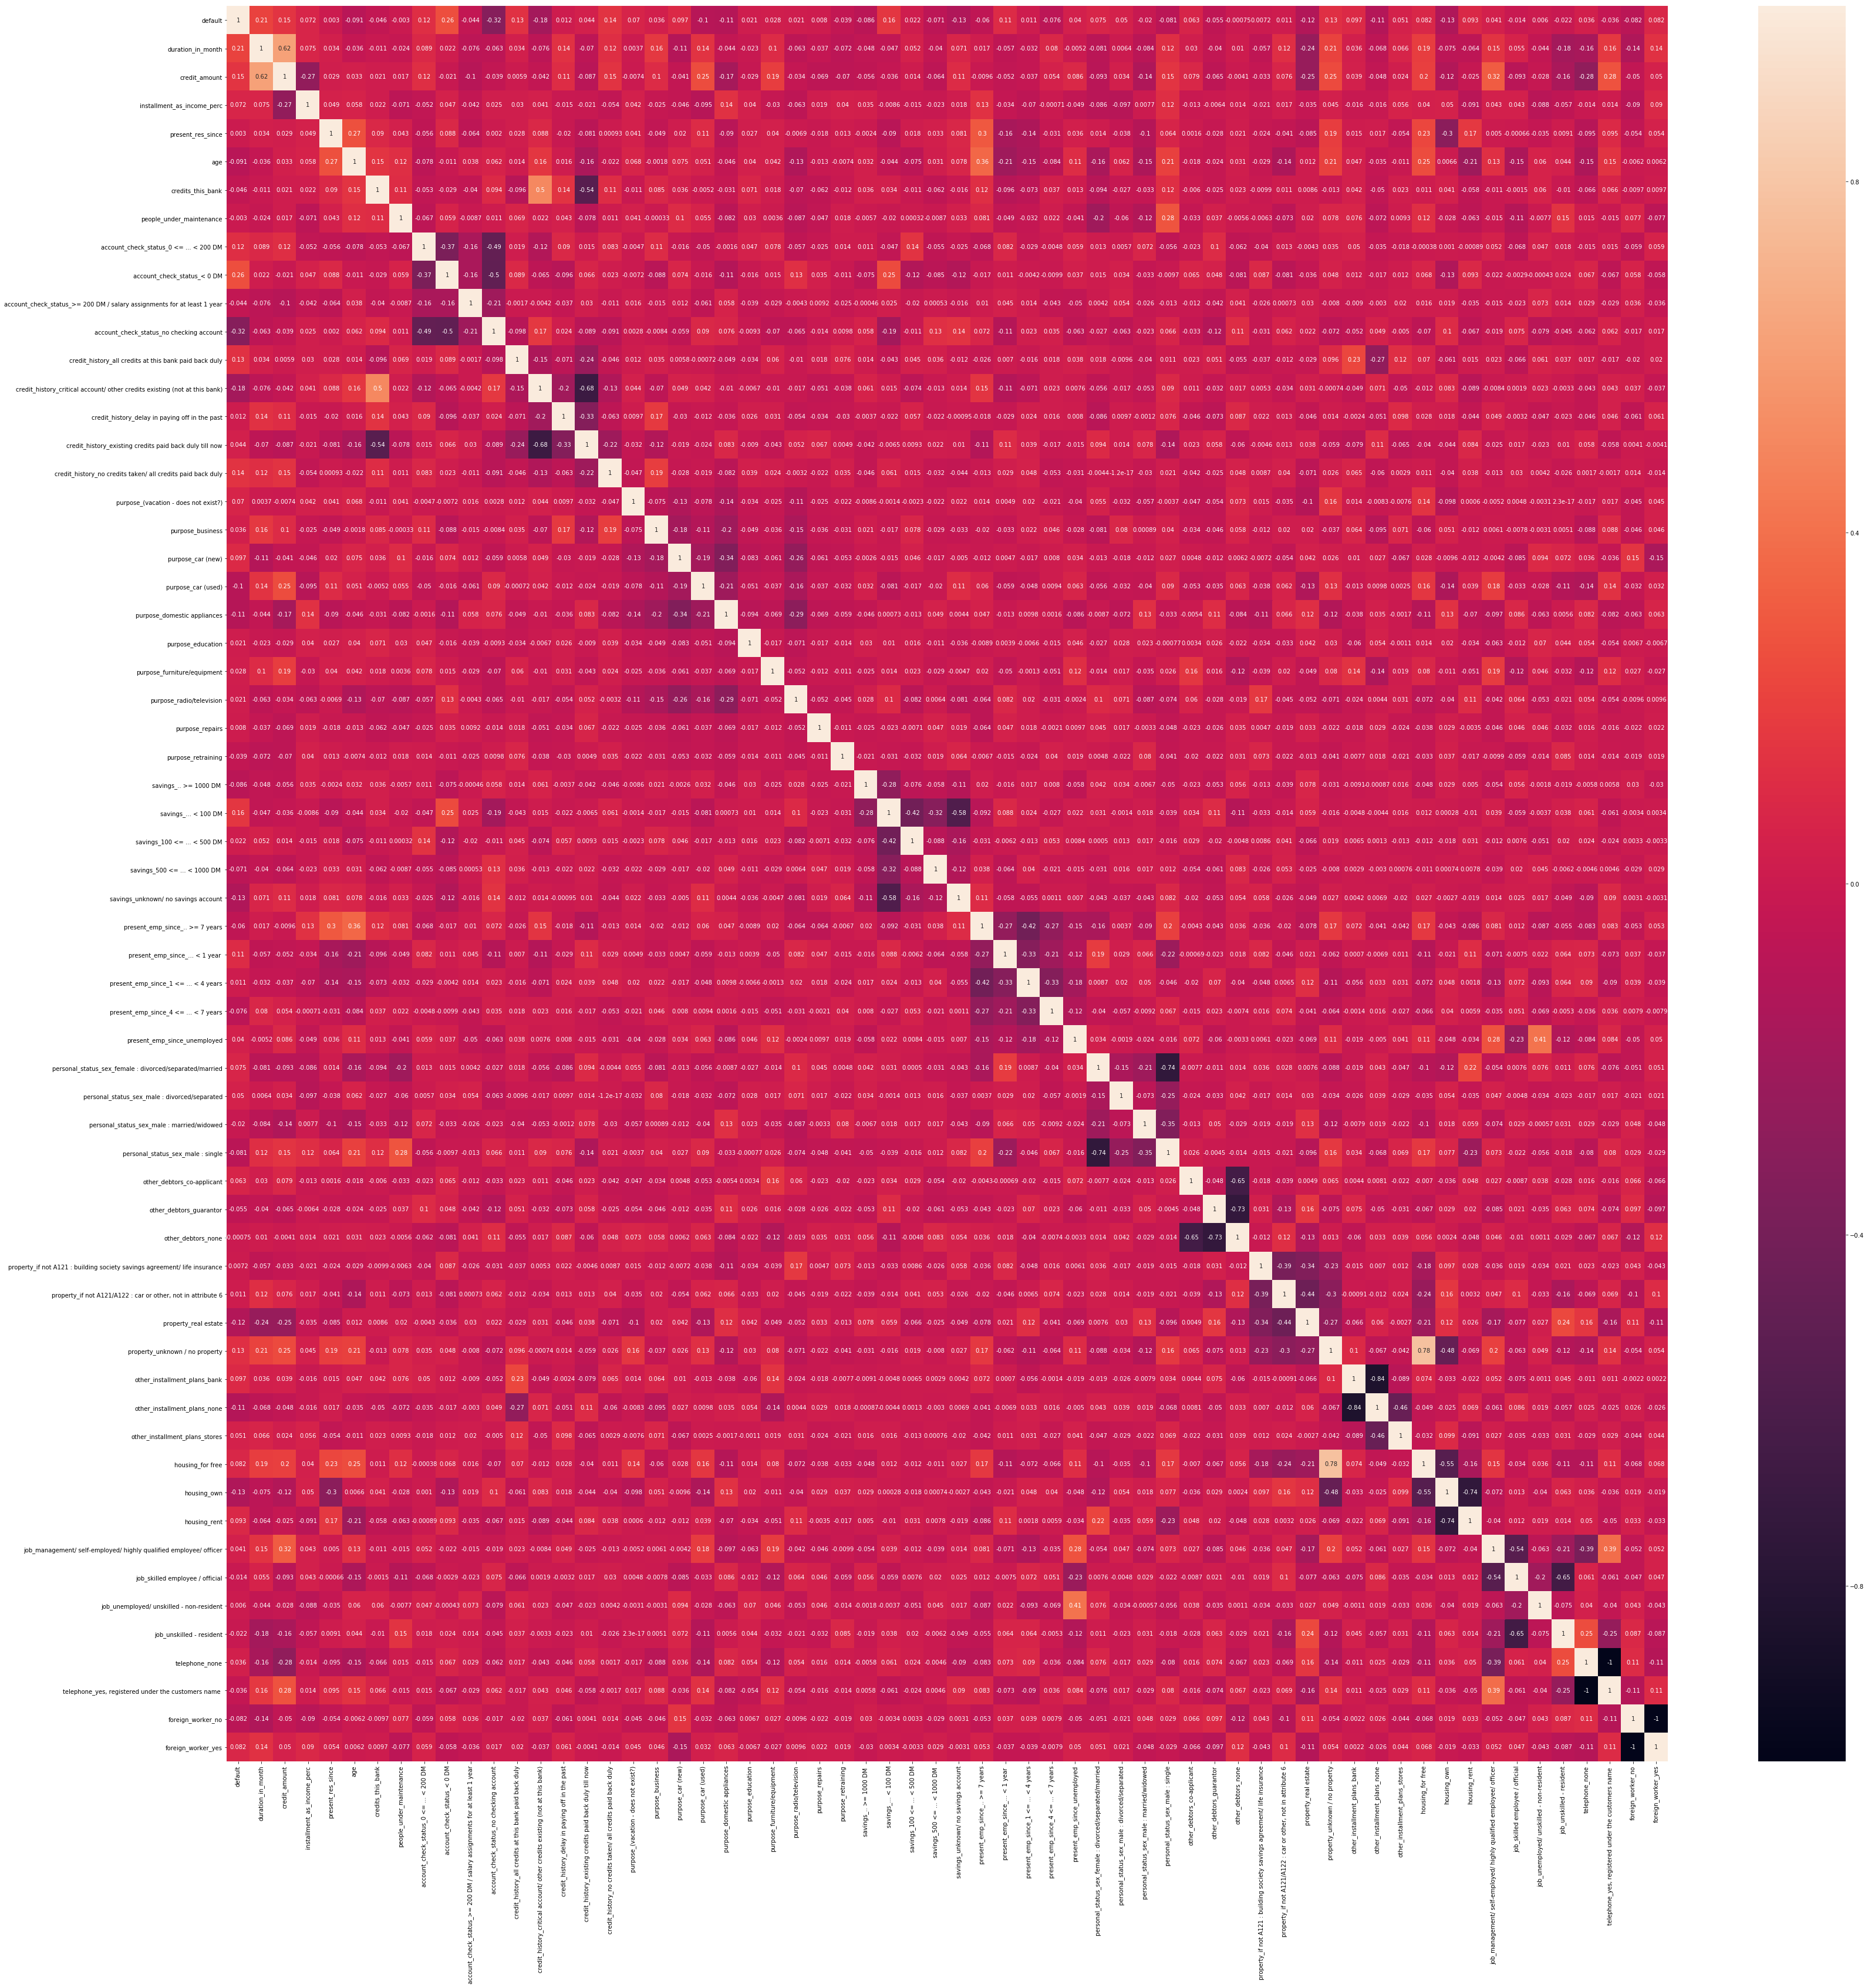

In [9]:
plt.figure(figsize=(55,55))
sns.heatmap(df.corr(),annot = True)

In [14]:
'''Observation
duration in month and credit_amount shows high correlation of 0.62
housing_for_free and property_unknown/No_property shows high correlation of 0.78'''

'Observation\nduration in month and credit_amount shows high correlation of 0.62\nhousing_for_free and property_unknown/No_property shows high correlation of 0.78'

### Drop the original variables which are converted to dummy

In [15]:
'''Already done seperated the numerical and categorical columns got dummies for categorical and then concatenated'''

'Already done seperated the numerical and categorical columns got dummies for categorical and then concatenated'

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('default', axis = 1) # default is the target column
y = df['default']
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=100) # Split into 70, 30 train test

(1000, 61)
(1000,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [18]:
from sklearn.ensemble import RandomForestClassifier
'''Used n_estimator = 488 instead of 500 which gave better test acuracy of 74%'''
randForest = RandomForestClassifier(criterion='entropy', random_state=9999,n_jobs=2, n_estimators=488)
randForest.fit(X_train, y_train)
pred = randForest.predict(X_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Train Accuracy :: ", accuracy_score(y_train, randForest.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, pred))

Train Accuracy ::  1.0
Test Accuracy  ::  0.74


### Q6 Show the list of the features importance( 1 Marks)

In [20]:
randForest.feature_importances_

array([0.08232534, 0.09532199, 0.03558055, 0.03229218, 0.0777011 ,
       0.0177844 , 0.0117571 , 0.01777622, 0.0312763 , 0.00862617,
       0.05132283, 0.00926796, 0.02100462, 0.00825524, 0.01329618,
       0.01143845, 0.007724  , 0.0088971 , 0.01764482, 0.01239204,
       0.01419154, 0.00567113, 0.00160146, 0.01275655, 0.00170373,
       0.00027777, 0.00640751, 0.01675547, 0.00937816, 0.00692288,
       0.01536908, 0.01365928, 0.01286529, 0.01604945, 0.01432464,
       0.00714714, 0.01462985, 0.0075762 , 0.00690558, 0.01622838,
       0.00539717, 0.00955858, 0.00974149, 0.01327707, 0.01510595,
       0.01858966, 0.01063607, 0.01352625, 0.01527803, 0.00665502,
       0.0069064 , 0.01614015, 0.01129231, 0.01207964, 0.01528992,
       0.00334698, 0.01214315, 0.01323217, 0.01344717, 0.00313225,
       0.00311888])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [22]:
# Use below values
num_folds = 10
seed = 77

In [23]:
#Validate the Random Forest model build above using k fold

In [24]:
num_instances = len(X)
kfold = KFold(n_splits=num_folds, random_state=seed) 
results = cross_val_score(randForest, X, y, cv=kfold)

In [25]:
#Calculate Mean score
print(results.mean())

0.765


In [26]:
# Calculate score standard deviation using std()

In [27]:
df.std()

default                                                                          0.458487
duration_in_month                                                               12.058814
credit_amount                                                                 2822.736876
installment_as_income_perc                                                       1.118715
present_res_since                                                                1.103718
age                                                                             11.375469
credits_this_bank                                                                0.577654
people_under_maintenance                                                         0.362086
account_check_status_0 <= ... < 200 DM                                           0.443662
account_check_status_< 0 DM                                                      0.446232
account_check_status_>= 200 DM / salary assignments for at least 1 year          0.243085
account_ch

# Q8 Print the confusion matrix( 1 Marks)

In [28]:
print("Confusion matrix \n", confusion_matrix(y_test, pred))

Confusion matrix 
 [[194  25]
 [ 53  28]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       219
           1       0.53      0.35      0.42        81

   micro avg       0.74      0.74      0.74       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.72      0.74      0.72       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [30]:
#Hint: Use roc_curve

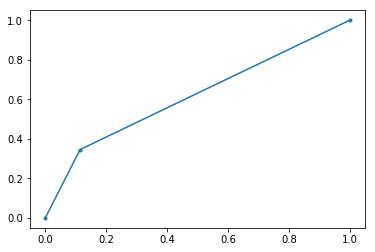

In [31]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [32]:
auc(fpr, tpr)

0.6157618806020633

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [33]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [34]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    randForest.fit(X_, y_)
    y_pred = randForest.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [35]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7499999999999999
Standard deviation:  0.010327955589886436
